In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# A function that reads files and returns three colums of the data
# First col = latitude, 2nd col = longitude, 3rd col = altitude
def Read_3_Column_File(file_name):
    data  = open(file_name, 'r')

    lines = data.readlines()
    
    #Remove first line
    lines.pop(0)
    
    lat = []
    long = []
    alt = []

    for line in lines:

        p = line.split()
        lat.append(float(p[0]))
        long.append(float(p[1]))
        alt.append(float(p[2]))
    data.close()
    return lat, long, alt

# We need an 89 by 89 matrix that would hold the latitudes and one that would hold the altitudes

def GimmeLats_alts(num, name):
    Lats = [[0]*89]*89
    Alts = [[0]*89]*89
    for i in range (0,num-1):
        file_string = '20191124_15UT' + name  + '/rayout_e'+ str(i+1) + name + '.txt'
        list_lat, list_long, list_alt = np.asarray(Read_3_Column_File(file_string))
        
        Lats[i] = list_lat
        Alts[i] = list_alt

    
    return Lats, Alts
                             

Lats5, Alts5 = GimmeLats_alts(90, '_5MHz')
Lats6, Alts6 = GimmeLats_alts(90, '_6MHz')
Lats8, Alts8 = GimmeLats_alts(90, '_8MHz')
Lats10, Alts10 = GimmeLats_alts(90, '_10MHz')
Lats11, Alts11 = GimmeLats_alts(90, '_11MHz')
Lats14, Alts14 = GimmeLats_alts(90, '_14MHz')

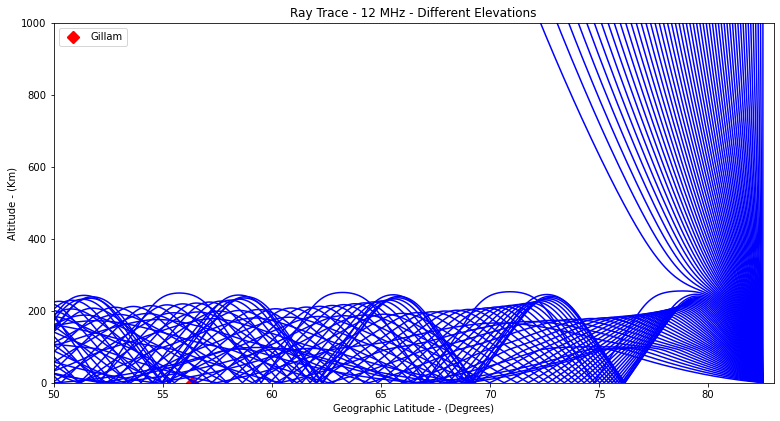

In [2]:
from pathlib import Path
fn = Path('mycoolfig.svg').expanduser()


fig = plt.figure(figsize=[10, 5])
ax = fig.add_axes([0, 0, 1, 1])
for i in range(89):
    plt.plot(Lats5[i], Alts5[i], color = 'blue')

plt.scatter(56.3480, 0, marker = 'x', linewidth = 10, label = 'Gillam', color = 'red')
ax.set_ylim(0, 1000)
ax.set_xlim(50, 83)
plt.xlabel('Geographic Latitude - (Degrees)')
plt.ylabel('Altitude - (Km)')
plt.title('Ray Trace - 12 MHz - Different Elevations')
plt.legend()

#fig.draw() # necessary to render figure before saving
fig.savefig(fn, bbox_inches='tight')
plt.show()



In [102]:
def plot_freq_ax(freq, Lats, Alts, fig = True, axes = None, legend = False):

    if fig: plt.figure(figsize=(14,7))
    ax = plt.gca() if axes is None else axes
    
    for i in range(89):
        ax.plot(Lats[i], Alts[i])
        
    ax.scatter(56.3480, 0, marker = "^", s = 150, label = 'Gillam', color = 'red')
    #ax.scatter(82, 0, marker = "^", s = 150, label = 'Alert', color = 'black')
    #ax.plot(Lats,Alts)
    
    ax.set_ylim(0, 1000)
    ax.set_xlim(50, 82)

    #ax.set_xlabel('Geographic Latitude - (Degrees)')
    #ax.set_ylabel('Altitude - (Km)')
    ax.set_title('Different Elevations for ' + freq + ' at 15 UT')
    if legend: ax.legend(loc = "best")

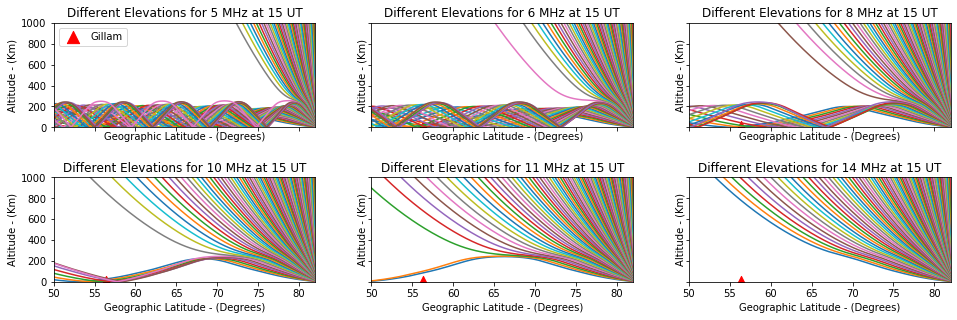

In [103]:
fig, axes = plt.subplots(2,3, figsize=(14,5), sharex = True, sharey = True)
fig.tight_layout(pad=4.0)

plt.setp(axes, xlabel = 'Geographic Latitude - (Degrees)', ylabel = 'Altitude - (Km)' )


plot_freq_ax('5 MHz', Lats5, Alts5, fig = False, axes=axes[0,0], legend = True)
plot_freq_ax('6 MHz', Lats6, Alts6, fig = False, axes=axes[0,1])
plot_freq_ax('8 MHz', Lats8, Alts8, fig = False, axes=axes[0,2] )
plot_freq_ax('10 MHz', Lats10, Alts10, fig = False, axes=axes[1,0] )
plot_freq_ax('11 MHz', Lats11, Alts11, fig = False, axes=axes[1,1] )
plot_freq_ax('14 MHz', Lats14, Alts14, fig = False, axes=axes[1,2] )